# Named Entity Recognition (NER)

In [1]:
import xml.etree.ElementTree as ET
import re
import spacy
import nltk
from wordcloud import WordCloud
from spacy import displacy
from matplotlib import pyplot as plt

### Reading data

In [2]:
def readXML(dataPath):
    sb = []
    root = ET.parse(dataPath).getroot()    
    for child in root[0]: 
        if child.tag == 'item': 
            s = child.find('description').text
            s = re.findall("<img.*/><p>(.+)</p>",s)
            sb.append(s[0])
    return sb

In [3]:
xml = readXML("./Data/European Investment Bank Press Releases/data/English_Press-releases.xml")
xml

['The EIB will finance around 40 projects in Barcelona that aim to support climate change mitigation and adaptation in the city. To this end, the EU bank will provide €95 million to promote urban regeneration, with a focus on the environment but also on social inclusion and job creation to boost the economic recovery in the wake of the COVID-19 crisis.',
 'The Italian healthcare system is also being reinforced to tackle the emergency situation caused by the COVID-19 pandemic. This is being conducted with the backing of the EU bank, the EIB, which is providing the Italian government with a €2 billion loan covering around two-thirds of the resources needed for the operations contained in the Decree for revival of the healthcare system',
 'The EIB Group and Banco Santander Consumer Portugal (BSCP) are joining forces to support Portuguese small and medium-sized enterprises (SMEs) and mid-caps affected by the COVID-19 crisis. The EU bank and BSCP have signed two agreements to provide EUR 58

### Named Entity Recognition

#### Ex. 1.1: Load the small spaCy model for English which has been trained on web documents 

Hint: This model is called *en_core_web_sm*

#### Ex 1.2: Create a document that has been annotated with named entities 

Hint: simply call the Language object *nlp* with your text. This will trigger the whole processing pipeline to run  
Hint 2: You cannot give it the array of strings directly, but either have to process each item separately or have to join the separate strings into 1 large one. 

#### Ex 1.3: Highlight the name entities in the text using spaCy's package "displacy"

Hint: use method *render* of displacy and set the style to named entities (*ent*)

#### Ex. 1.4: Are there some abbreviations for the named entities that you don't know? You can get an explanation for them using spaCy's ``explain`` method

### Visualization

#### Ex 2.1: Next, we are going to visualize the text as a word cloud. Run the code below. Does it help you to get an idea of the content of the documents? 

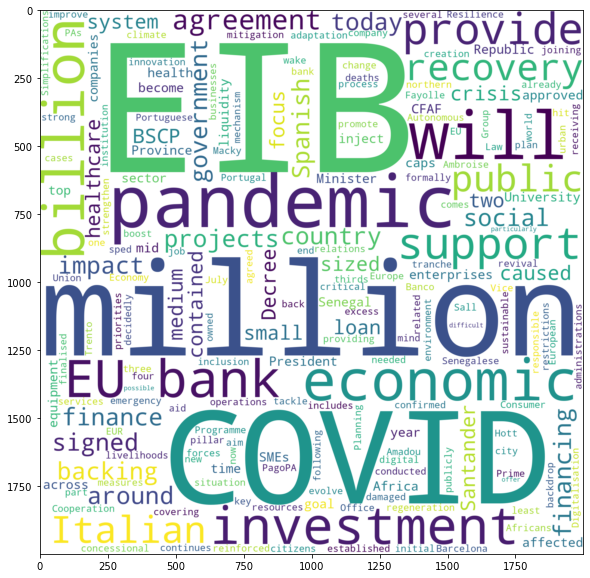

In [8]:
wordcloud = WordCloud(width = 2000, height = 2000, background_color = "white").generate(" ".join(xml))
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation = "bilinear")

#### Ex 2.2: Create a word cloud visualizing only the counts of the names of organizations in the data set

Hint: first you must combine all named entities into a single string. You can get access to the named entities via the attribute *ents* of the spaCy document. Loop over the values and collect all of them in a separate variable that have been tagged as an organization (tag *ORG*)  
Hint 2: If you want to have multi-term phrases being kept together in the word cloud you must create a dictionary in the form {phrase: count, ...} and use method *generate_from_frequencies* instead. 

### More Tasks (only if time permits; choose the one(s) you like best)

<b>1. Load and process text in French or German  </b>  
The same data set is also available in French and German. Load and process the data. 
Compare the results with the English ones. Were the same entities marked? Is the quality of the results the same? 

<b>2. Apply NER to the job posts</b>  
How good is the quality of the results for this data set? Do you have an explanation for some of the errors that are made? 

<b>3. Extract all adjectives or all nouns of the texts and visualize them in a word cloud </b>  
Hint: spaCy did not only extract the named entities when you called *nlp()* but it also tagged the parts of speech in the document already. You can access them via the attribute *pos_* of the tokens of the document.